In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score

from xgboost import XGBClassifier, plot_importance

In [3]:
raw_df = pd.read_csv('../datasets/cs-training.csv', index_col=0)

In [4]:
y = raw_df['SeriousDlqin2yrs']

# Preprocessing 

In [5]:
STRAT_IMPUTER_NUM = "median"
STRAT_IMPUTER_CAT = "most_frequent"

num_pipeline = Pipeline([
  #  ('indicator', MissingIndicator()),
    ('imputer', SimpleImputer(strategy=STRAT_IMPUTER_NUM)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
   # ('indicator', MissingIndicator()),
    ('imputer', SimpleImputer(strategy=STRAT_IMPUTER_CAT))
])

In [6]:
cat_features = ['age', 'NumberOfTime30-59DaysPastDueNotWorse',
                                     'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                                     'NumberOfDependents']

num_features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
]) 

In [7]:
X = pd.DataFrame(full_pipeline.fit_transform(raw_df.copy()),
                           columns=num_features+cat_features)

In [8]:
X

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.021150,-0.172833,0.209579,45.0,2.0,13.0,0.0,6.0,0.0,2.0
1,-0.020385,-0.173168,-0.296226,40.0,0.0,4.0,0.0,0.0,0.0,1.0
2,-0.021582,-0.173186,-0.261937,38.0,1.0,2.0,1.0,0.0,0.0,0.0
3,-0.023281,-0.173210,-0.241922,30.0,0.0,5.0,0.0,0.0,0.0,0.0
4,-0.020585,-0.173215,4.435064,49.0,1.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,-0.024055,-0.173117,-0.335014,74.0,0.0,4.0,0.0,1.0,0.0,0.0
149996,-0.023017,-0.172876,-0.064735,44.0,0.0,4.0,0.0,1.0,0.0,2.0
149997,-0.023232,1.725868,-0.079009,58.0,0.0,18.0,0.0,1.0,0.0,0.0
149998,-0.024218,-0.173228,-0.054495,30.0,0.0,4.0,0.0,0.0,0.0,0.0


# Model

## Logistic Regresion

In [91]:
log_reg = LogisticRegression(max_iter=1000)

In [92]:
scores_log_reg = cross_val_score(log_reg, X, y,
                        scoring='roc_auc', cv = 10)

In [103]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Std deviation: {scores.std()}")

In [100]:
display_scores(scores_log_reg)

Scores: [0.68532553 0.69819088 0.69772525 0.69308236 0.69398869 0.70756727
 0.70018785 0.70360889 0.70642167 0.697069  ]
Mean: 0.6983167394288394
Std deviation: 0.0063213511009642415


## Decision Trees

In [101]:
tree_class = DecisionTreeClassifier()
scores_dtree = cross_val_score(tree_class, X, y,
                              scoring='roc_auc', cv = 10)

In [104]:
display_scores(scores_dtree)

Scores: [0.6104833  0.60885978 0.61244928 0.61338671 0.61520144 0.61887756
 0.62191405 0.62221549 0.59948395 0.62393166]
Mean: 0.6146803231750305
Std deviation: 0.007082765427103151


## SVM

In [123]:
svm_clf = LinearSVC(tol=1e-3)
scores_svm = cross_val_score(svm_clf, X, y,
                              scoring='roc_auc', cv = 10)

/home/glevi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/glevi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/glevi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/glevi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/glevi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

In [124]:
display_scores(scores_svm)

Scores: [0.65294158 0.73742931 0.67762758 0.67878788 0.70655534 0.72773068
 0.67037507 0.69488851 0.69567676 0.64327539]
Mean: 0.6885288108198099
Std deviation: 0.02863938668107729


## XGBoost

In [116]:
xgb_class = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores_xgb = cross_val_score(xgb_class, X, y,
                              scoring='roc_auc', cv = 10)

In [117]:
display_scores(scores_xgb)

Scores: [0.85239883 0.86328879 0.85534715 0.85941326 0.85914372 0.86251231
 0.85702498 0.85859625 0.86176172 0.87139844]
Mean: 0.8600885449259185
Std deviation: 0.004913277221155152


### Confusion Matrix

In [141]:
xgb_predicts = cross_val_predict(xgb_class, X, y, cv = 3)

<AxesSubplot:>

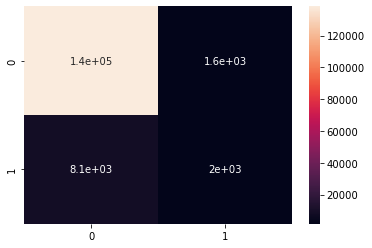

In [147]:
conf_mx = confusion_matrix(y, xgb_predicts)

sns.heatmap(conf_mx, annot = True)

### Feature Importance

In [143]:
xgb_class.fit(X, y)

array([0.09676119, 0.02522485, 0.02249623, 0.02569347, 0.1477088 ,
       0.02563391, 0.5150754 , 0.03190425, 0.08895302, 0.02054889],
      dtype=float32)

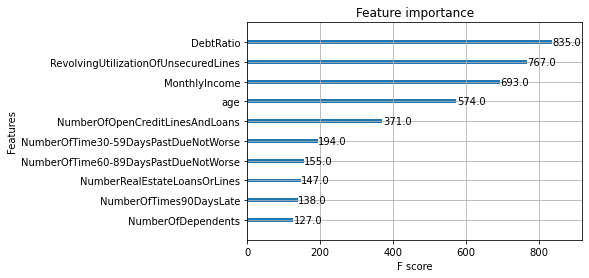

In [146]:
plot_importance(xgb_class)
plt.show()

### Fine-Tunning

In [149]:
param_grid = [{
    'n_estimators': [30, 100, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.03, 0.1, 0.3]
}]

In [151]:
grid_search = GridSearchCV(xgb_class, param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True,
                           refit=True, verbose=3)
grid_search.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.03, max_depth=3, n_estimators=30;, score=(train=0.839, test=0.832) total time=   0.7s
[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=30;, score=(train=0.840, test=0.836) total time=   0.7s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=30;, score=(train=0.840, test=0.837) total time=   0.7s
[CV 4/5] END learning_rate=0.03, max_depth=3, n_estimators=30;, score=(train=0.842, test=0.841) total time=   0.7s
[CV 5/5] END learning_rate=0.03, max_depth=3, n_estimators=30;, score=(train=0.838, test=0.844) total time=   0.7s
[CV 1/5] END learning_rate=0.03, max_depth=3, n_estimators=100;, score=(train=0.853, test=0.847) total time=   3.2s
[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=100;, score=(train=0.854, test=0.848) total time=   2.3s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=100;, score=(train=0.851, test=0.850) total time=   3.2s
[CV 4/5] END le

[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=300;, score=(train=0.886, test=0.860) total time=  15.4s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=300;, score=(train=0.885, test=0.864) total time=  15.6s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=300;, score=(train=0.886, test=0.864) total time=  14.8s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=300;, score=(train=0.883, test=0.871) total time=  14.9s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=(train=0.863, test=0.853) total time=   2.4s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=(train=0.864, test=0.854) total time=   2.4s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=(train=0.863, test=0.859) total time=   1.5s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=(train=0.862, test=0.857) total time=   2.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=(train=0.862, t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraint...
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                         

In [152]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [153]:
LEARNING_RATE = 0.1
MAX_DEPTH = 3
N_ESTIMATORS = 300

In [159]:
xgb_fine = XGBClassifier(learning_rate=LEARNING_RATE,
                         max_depth=MAX_DEPTH,
                         n_estimators=N_ESTIMATORS,
                         use_label_encoder=False,
                        eval_metric='logloss')

xgb_fine.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [165]:
predict = xgb_fine.predict_proba(X)
roc_auc_score(y, predict[:,1])

0.8756413348013669

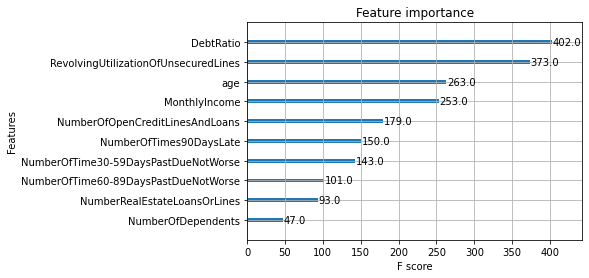

In [167]:
plot_importance(xgb_fine)
plt.show()

# Feature Engineering

In [9]:
X = raw_df.copy().drop(columns='SeriousDlqin2yrs')
y = raw_df['SeriousDlqin2yrs']

In [10]:
age_ix, dep_ix = 0, 6

class CatTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X[X[:, age_ix] < 18] = 18
        dependents_per_age = X[:, dep_ix]/X[:, age_ix]
        return np.c_[X, dependents_per_age]

In [54]:
rev_ix, debt_ix, inc_ix = 0, 1, 2 

class NumTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X[X[:, debt_ix] > 3500] = 3500
        return np.c_[X]

In [55]:
STRAT_IMPUTER_NUM = "median"
STRAT_IMPUTER_CAT = "most_frequent"

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy=STRAT_IMPUTER_NUM)),
    ('adder', NumTransformer()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy=STRAT_IMPUTER_CAT)),    
    ('adder', CatTransformer())
])

In [56]:
cat_features = ['age', 'NumberOfTime30-59DaysPastDueNotWorse',
                                     'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                                     'NumberOfDependents']

num_features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

transformer_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
]) 

In [57]:
X_prepared = pd.DataFrame(transformer_pipeline.fit_transform(X))

In [58]:
X_prepared

,0,1,2,3,4,5,6,7,8,9,10
0,-0.153952,-0.364951,0.212631,45.0,2.0,13.0,0.0,6.0,0.0,2.0,0.044444
1,-0.153631,-0.365802,-0.292969,40.0,0.0,4.0,0.0,0.0,0.0,1.0,0.025000
2,-0.154133,-0.365848,-0.258693,38.0,1.0,2.0,1.0,0.0,0.0,0.0,0.000000
3,-0.154846,-0.365910,-0.238686,30.0,0.0,5.0,0.0,0.0,0.0,0.0,0.000000
4,-0.153715,-0.365924,4.436408,49.0,1.0,7.0,0.0,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.155171,-0.365673,-0.331742,74.0,0.0,4.0,0.0,1.0,0.0,0.0,0.000000
149996,-0.154736,-0.365059,-0.061571,44.0,0.0,4.0,0.0,1.0,0.0,2.0,0.045455
149997,5.723621,4.011995,-0.223177,58.0,0.0,18.0,0.0,1.0,0.0,0.0,0.000000
149998,-0.155239,-0.365955,-0.051335,30.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000


In [59]:
LEARNING_RATE = 0.1
MAX_DEPTH = 3
N_ESTIMATORS = 300
EVAL_METRIC = 'logloss'

model = XGBClassifier(learning_rate=LEARNING_RATE,
                         max_depth=MAX_DEPTH,
                         n_estimators=N_ESTIMATORS,
                         use_label_encoder=False,
                        eval_metric=EVAL_METRIC)

In [60]:
pipeline = Pipeline(steps=[('transformer', transformer_pipeline),
                           ('model',model)])


In [ ]:
pipeline.fit(X, y)

In [ ]:
y_pred = pipeline.predict_proba(X)

In [53]:
roc_auc_score(y, y_pred[:,1])

0.8716039944308029